# Imports et Références

In [170]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

data = pd.read_excel('pubScient.xlsx')

C:\Users\mgoudal\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning:

Unknown extension is not supported and will be removed



# 1. Le nuage de points entre le nombre moyen de documents produits par an et le nombre moyen de citations par an, pour chaque pays

# 2. Une représentation graphique de l’évolution des rangs des pays, uniquement sur les 10 premiers rangs, avec le pays en 1er en haut

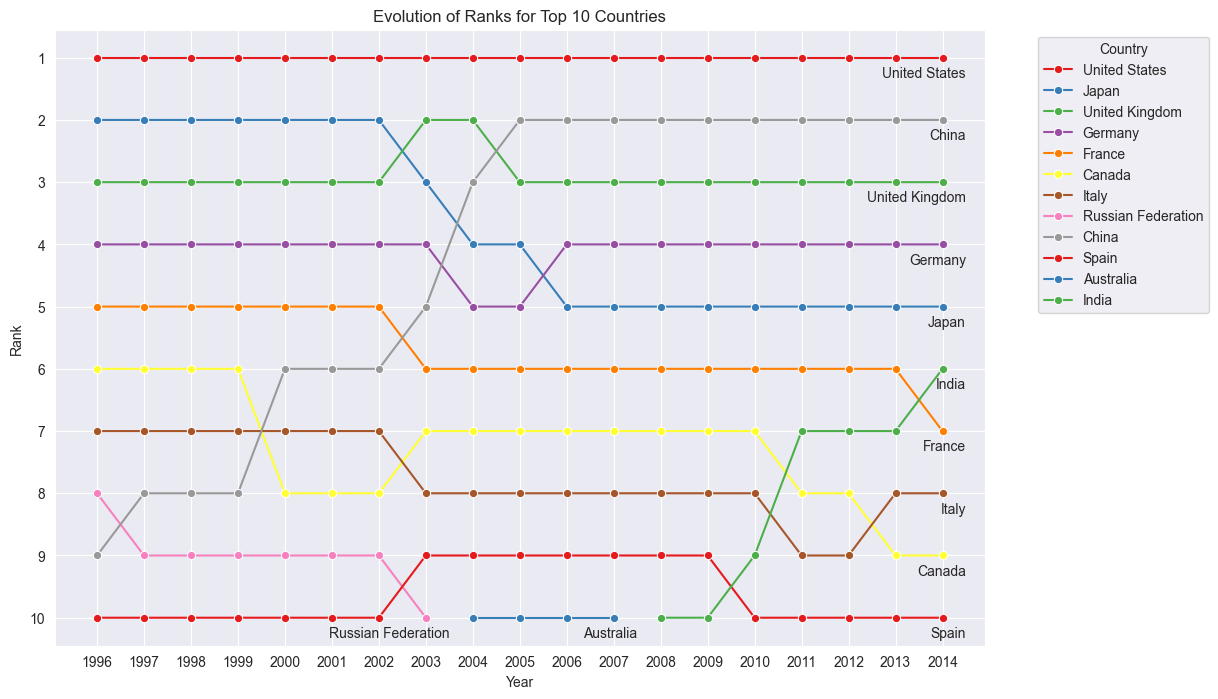

In [171]:
top_countries = data[data['Rank'] <= 10]

plt.figure(figsize=(12, 8))
sns.lineplot(data=top_countries, x='Year', y='Rank', hue='Country', palette='Set1', marker='o')

plt.xlabel('Year')
plt.ylabel('Rank')
plt.title('Evolution of Ranks for Top 10 Countries')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.gca().invert_yaxis()
plt.xticks(top_countries['Year'].unique())
plt.yticks(range(1, top_countries['Rank'].max() + 1))

for country, rank in top_countries.groupby('Country'):
    plt.text(rank['Year'].iloc[-1] + 0.5, rank['Rank'].iloc[-1] + 0.25, country, fontsize=10, ha='right', va='center')

plt.grid(True)
plt.show()


# 3. Une carte des pays dont le H-index moyen est supérieur à un seuil choisi par l’utilisateur

In [172]:
colorscale = px.colors.sequential.Plasma

# Seuil 
limit = 50  
filtered_data = data[data['H.index'] >= limit]

fig = px.choropleth(filtered_data, 
                    locations='Country', 
                    locationmode='country names', 
                    color='H.index', 
                    color_continuous_scale=colorscale, 
                    range_color=(0, data['H.index'].max() + 100), 
                    title=f'Carte du monde dégradé par H.Index (H-index > {limit})',
                    width=1500,
                    height=1000, 
                    hover_data={'H.index': True, 'Country': True}, 
                   )

fig.show()


# 4. Une carte des pays représentant le TOP réalisé plus haut

In [173]:
top_countries = data[data['Rank'] <= 10]

fig = px.choropleth(top_countries, 
                    locations='Country', 
                    locationmode='country names', 
                    color='Documents',  
                    color_continuous_scale='blugrn', 
                    range_color=(top_countries['Documents'].min(), top_countries['Documents'].max()),  
                    title='Top 10 Countries by Document Production',
                    width=1500,  
                    height=1000,  
                    hover_data={'Documents': True, 'Country': True}  
                   )

fig.show()

# 4 BIS. Une carte des pays représentant le TOP réalisé plus haut

In [174]:
import plotly.express as px
import ipywidgets as widgets

def update_map(year):
    filtered_data = data[(data['Year'] == year) & (data['Rank'] <= 10)]
    
    fig = px.choropleth(filtered_data, 
                        locations='Country', 
                        locationmode='country names', 
                        color='Documents',  
                        color_continuous_scale='magma', 
                        range_color=(0, filtered_data['Documents'].max()+50000),  
                        title=f'Top 10 Countries by Document Production for the year {year}',
                        width=1500,  
                        height=1000,  
                        hover_data={'Documents': True, 'Country': True}  
                       )
    
    fig.show()

year_slider = widgets.IntSlider(value=data['Year'].min(), min=data['Year'].min(), max=data['Year'].max(), step=1, description='Year:')

widgets.interactive(update_map, year=year_slider)


interactive(children=(IntSlider(value=1996, description='Year:', max=2014, min=1996), Output()), _dom_classes=…